<a href="https://colab.research.google.com/github/Nadda1004/Intro_Machine_learning/blob/main/WeekendProject_Week_2/W2_D5_ML_Week2_Project_Dummies_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Group Members:**
*  Nada Alzahrani
*  Abeer Alghamdi
*  Afrah Alharbi


In [1]:
# Import what you need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import *
sns.set_palette('Set3')

In [2]:
col_names=["target", "cap_shape","cap_surface", "cap_color", "bruises", "odor", "gill-attachment", "gill_spacing", "gill_size", "gill_color", "stalk_shape", "stalk_root", "stalk_surface_above_ring", "stalk_surface-below_ring", "stalk_color_above_ring", "stalk_color_below_ring", "veil_type", "veil_color", "ring_number", "ring_type", "spore_print_color", "population", "habitat"]
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", names=col_names)
print(f"Mushroom Data Shape: {df.shape}")
df.head()

Mushroom Data Shape: (8124, 23)


,target,cap_shape,cap_surface,cap_color,bruises,odor,gill-attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface-below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


#####  Map Every Letter to its full name (So it can be more understandable)

In [3]:
df['target']= df['target'].map({ "e" : "edible"  , 'p':'poisonous'})
df['cap_shape']= df['cap_shape'].map({ "b" : "bell"  , 'c':'conical' , 'x':'convex'  , 'f':'flat'  , 'k':'knobbed'  , 's':'sunken'})
df['cap_surface']= df['cap_surface'].map({ "f" : "fibrous"  , 'g':'grooves' , 'y':'scaly'  , 's':'smooth'})
df['cap_color']= df['cap_color'].map({ "n" : "brown"  , 'b':'buff' , 'c':'cinnamon'  , 'g':'gray'  , 'r':'green'  , 'p':'pink' ,
                                      'u':'purple'  , 'e':'red'  , 'w':'white'  , 'y':'yellow'})
df['bruises']= df['bruises'].map({ "t" : "Yes"  , 'f':'No'})
df['odor']= df['odor'].map({ "a" : "almond"  , 'l':'anise' , 'c':'creosote'  , 'y':'fishy'  , 'f':'foul'  , 'm':'musty' , 'n':'none'  , 'p':'pungent'  , 's':'spicy'})
df['gill-attachment']= df['gill-attachment'].map({ "a" : "attached"  , 'd':'descending' , 'f':'free'  , 'n':'notched'})
df['gill_spacing']= df['gill_spacing'].map({ "c" : "close"  , 'w':'crowded' , 'd':'distant'})
df['gill_size']= df['gill_size'].map({ "b" : "broad"  , 'n':'narrow'})
df['gill_color']= df['gill_color'].map({ "k" : "black"  , 'n':'brown' , 'b':'buff'  , 'h':'chocolate'  ,
                                        'g':'gray'  , 'r':'green', 'o':'orange', 'p':'pink', 'u':'purple', 'e':'red', 'w':'white', 'y':'yellow'})
df['stalk_shape']= df['stalk_shape'].map({ "e" : "enlarging"  , 't':'tapering'})
df['stalk_root']= df['stalk_root'].map({ "b" : "bulbous"  , 'c':'club' , 'u':'cup'  , 'e':'equal'  , 'z':'rhizomorphs'  , 'r':'rooted', '?':'missing'})
df['stalk_surface_above_ring']= df['stalk_surface_above_ring'].map({ "f" : "fibrous"  , 'y':'scaly' , 'k':'silky'  , 's':'smooth'})
df['stalk_surface-below_ring']= df['stalk_surface-below_ring'].map({ "f" : "fibrous"  , 'y':'scaly' , 'k':'silky'  , 's':'smooth'})
df['stalk_color_above_ring']= df['stalk_color_above_ring'].map({ "n" : "brown"  , 'b':'buff' , 'c':'cinnamon'  , 'g':'gray'  ,
                                                                'o':'orange'  , 'p':'pink', 'e':'red'  , 'w':'white', 'y':'yellow'})
df['stalk_color_below_ring']= df['stalk_color_below_ring'].map({ "n" : "brown"  , 'b':'buff' , 'c':'cinnamon'  , 'g':'gray'  ,
                                                                'o':'orange'  , 'p':'pink', 'e':'red'  , 'w':'white', 'y':'yellow'})
df['veil_type']= df['veil_type'].map({ "p" : "partial"})
df['veil_color']= df['veil_color'].map({ "n" : "brown"  , 'o':'orange' , 'w':'white'  , 'y':'yellow'})
df['ring_number']= df['ring_number'].map({ "n" : "none"  , 'o':'one' , 't':'two'})
df['ring_type']= df['ring_type'].map({ "c" : "cobwebby"  , 'e':'evanescent' , 'f':'flaring'  , 'l':'large' , 'n': 'none','p':'pendant', 's':'sheathing'  , 'z':'zone'})
df['spore_print_color']= df['spore_print_color'].map({ "k" : "black"  , 'b':'buff' , 'h':'chocolate'  , 'r':'green' , 'o': 'orange','u':'purple',
                                                      'w':'white'  , 'y':'yellow' , "n" : "brown"})
df['population']= df['population'].map({ "a" : "abundant"  , 'c':'clustered' , 'n':'numerous'  , 's':'scattered', 'v':'several', 'y':'solitary'})
df['habitat']= df['habitat'].map({ "g" : "grasses"  , 'l':'leaves' , 'm':'meadows'  , 'p':'paths', 'u':'urban', 'w':'waste', 'd':'woods'})

In [4]:
df.head()

,target,cap_shape,cap_surface,cap_color,bruises,odor,gill-attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface-below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,convex,smooth,brown,Yes,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,Yes,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,Yes,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,Yes,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,No,none,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


## EDA

### Simple Data Exploration

In [5]:
# dataset Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   target                    8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface-below_ring  8124 non-null   object
 14  stalk_color_above_ring  

#### Null Values 

In [6]:
df.isnull().sum()

target                      0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill-attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface-below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

In [7]:
# Catgorical column describtion 
df.describe(exclude=[np.number])

,target,cap_shape,cap_surface,cap_color,bruises,odor,gill-attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface-below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,edible,convex,scaly,brown,No,none,free,close,broad,buff,tapering,bulbous,smooth,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
# Target Distribution 
df.target.value_counts()

edible       4208
poisonous    3916
Name: target, dtype: int64

## Visualization 

##### Target Distribution

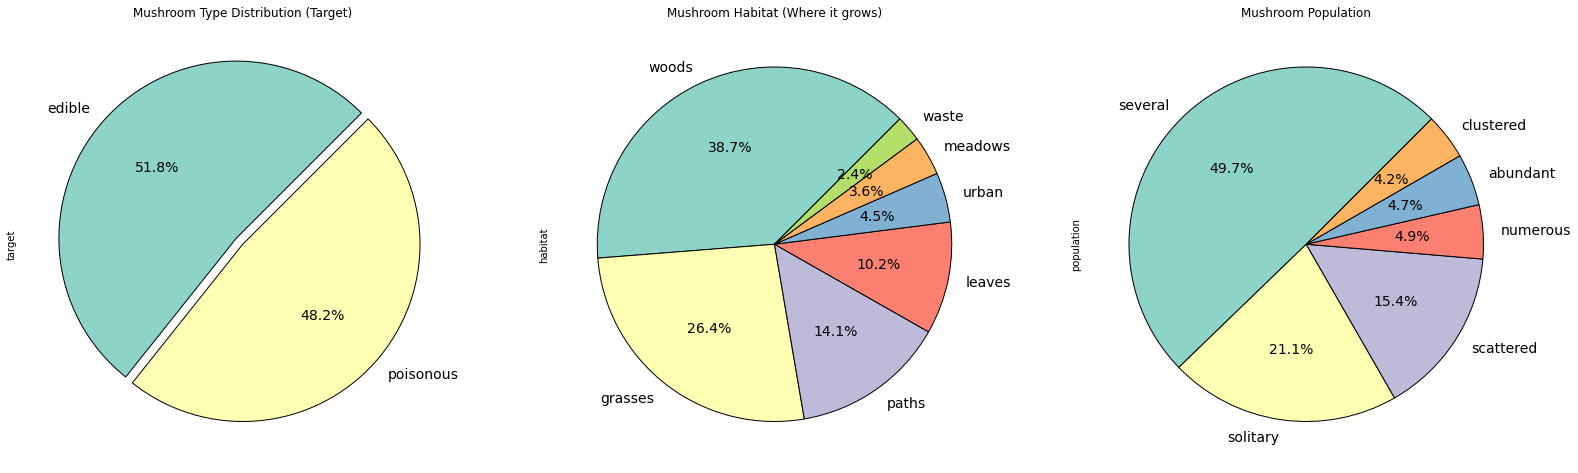

In [9]:
# View Target Distribution
plt.figure(figsize=(27,25))
plt.subplot(1 , 3 , 1)
df.target.value_counts().plot.pie(explode= (0.05 , 0), autopct='%1.1f%%', startangle=45 , textprops={'fontsize': 14} , 
                                  wedgeprops = {"edgecolor" : "black",'linewidth': 1,'antialiased': True}).set(title = 'Mushroom Type Distribution (Target)');

plt.subplot(1 , 3 , 2)
df.habitat.value_counts().plot.pie(autopct='%1.1f%%', startangle=45 , textprops={'fontsize': 14} , 
                                  wedgeprops = {"edgecolor" : "black",'linewidth': 1,'antialiased': True}).set(title = 'Mushroom Habitat (Where it grows)');


plt.subplot(1 , 3 , 3)
df.population.value_counts().plot.pie(autopct='%1.1f%%', startangle=45 , textprops={'fontsize': 14} , 
                                  wedgeprops = {"edgecolor" : "black",'linewidth': 1,'antialiased': True}).set(title = 'Mushroom Population');

##### Habitat By target

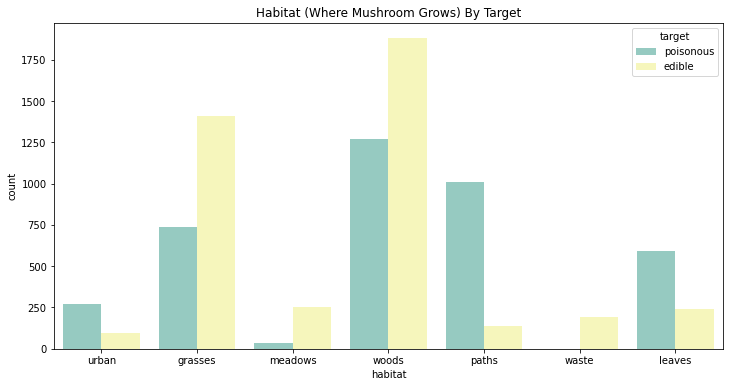

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'habitat' , hue = 'target' , data = df).set(title = 'Habitat (Where Mushroom Grows) By Target');

##### Mushroom Cap Info

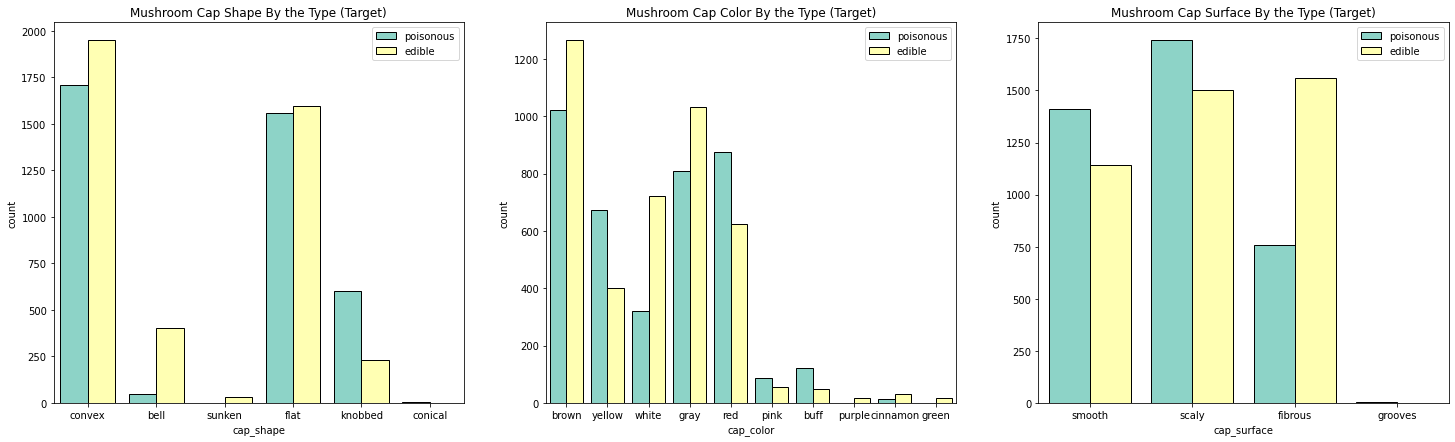

In [11]:
# Mushroom Cap infromation 
plt.figure(figsize=(25,7))
plt.subplot(1 , 3 , 1)
sns.countplot(x = df.cap_shape , hue = df.target , saturation=1,
                  edgecolor=(0,0,0), linewidth=1).set(title= 'Mushroom Cap Shape By the Type (Target)');
plt.legend(loc='upper right')

plt.subplot(1 , 3 , 2)
sns.countplot(x = df.cap_color , hue = df.target , saturation=1,
                  edgecolor=(0,0,0), linewidth=1).set(title= 'Mushroom Cap Color By the Type (Target)');
plt.legend(loc='upper right')

plt.subplot(1 , 3 , 3)
sns.countplot(x = df.cap_surface , hue = df.target , saturation=1,
                  edgecolor=(0,0,0), linewidth=1).set(title= 'Mushroom Cap Surface By the Type (Target)');
plt.legend(loc='upper right');

##### Mushroom Gill Info

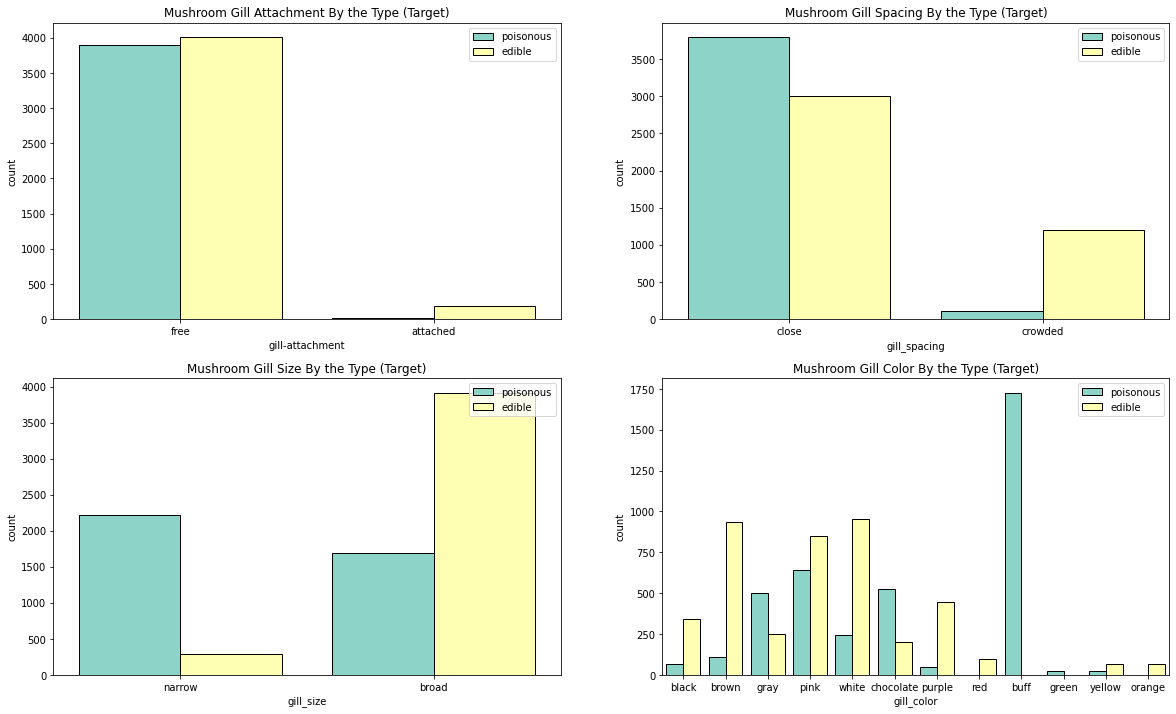

In [12]:
# Mushroom Gill infromation 
plt.figure(figsize=(20,12))
plt.subplot(2 , 2 , 1)
sns.countplot(x = df['gill-attachment'] , hue = df.target , saturation=1,
                  edgecolor=(0,0,0), linewidth=1).set(title= 'Mushroom Gill Attachment By the Type (Target)');
plt.legend(loc='upper right')

plt.subplot(2 , 2 , 2)
sns.countplot(x = df.gill_spacing , hue = df.target , saturation=1,
                  edgecolor=(0,0,0), linewidth=1).set(title= 'Mushroom Gill Spacing By the Type (Target)');
plt.legend(loc='upper right')

plt.subplot(2 , 2 , 3)
sns.countplot(x = df.gill_size , hue = df.target , saturation=1,
                  edgecolor=(0,0,0), linewidth=1).set(title= 'Mushroom Gill Size By the Type (Target)');
plt.legend(loc='upper right');

plt.subplot(2 , 2 , 4)
sns.countplot(x = df.gill_color , hue = df.target , saturation=1,
                  edgecolor=(0,0,0), linewidth=1).set(title= 'Mushroom Gill Color By the Type (Target)');
plt.legend(loc='upper right');

##### Mushroom Stalk Info

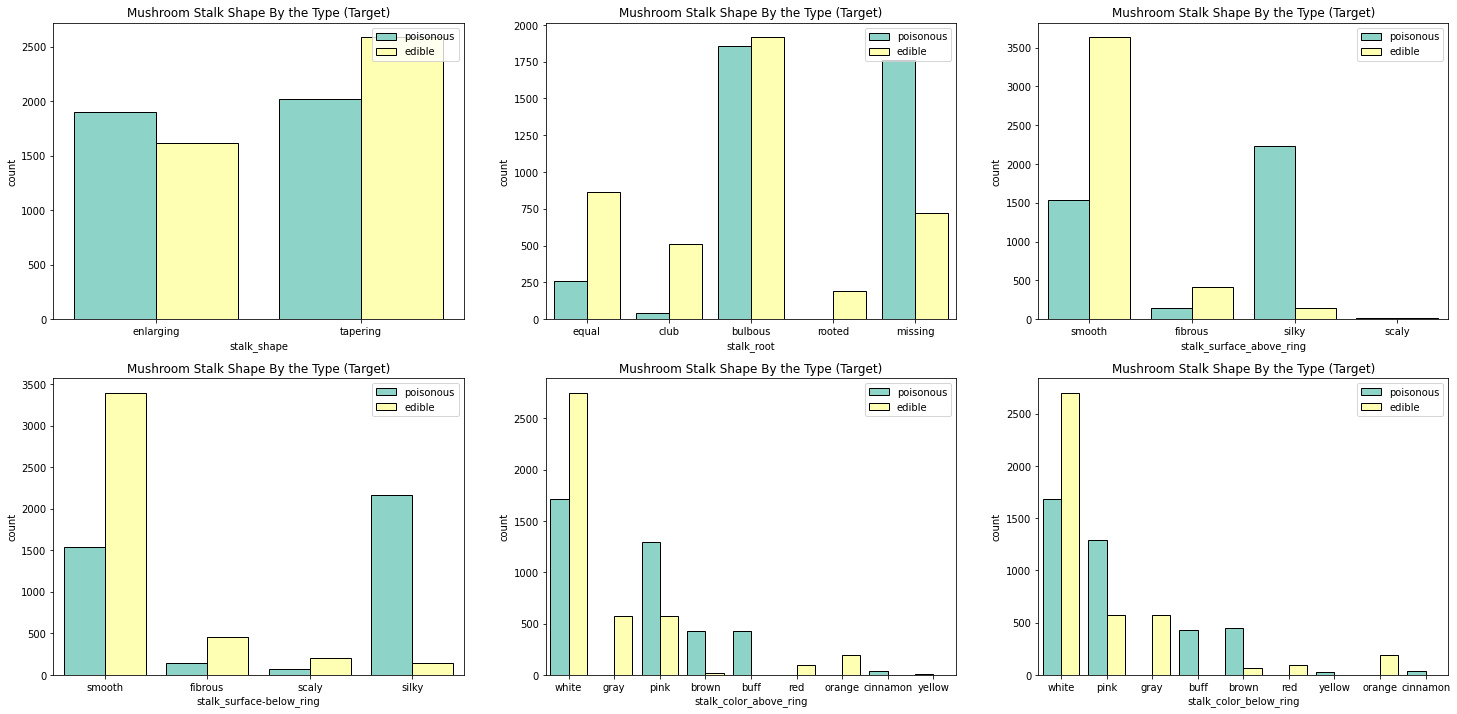

In [13]:
# Mushroom Stalk infromation 
plt.figure(figsize=(25,12))
plt.subplot(2 , 3 , 1)
sns.countplot(x = df.stalk_shape , hue = df.target , saturation=1,
                  edgecolor=(0,0,0), linewidth=1).set(title= 'Mushroom Stalk Shape By the Type (Target)');
plt.legend(loc='upper right')

plt.subplot(2 , 3 , 2)
sns.countplot(x = df.stalk_root , hue = df.target , saturation=1,
                  edgecolor=(0,0,0), linewidth=1).set(title= 'Mushroom Stalk Shape By the Type (Target)');
plt.legend(loc='upper right')

plt.subplot(2 , 3 , 3)
sns.countplot(x = df.stalk_surface_above_ring, hue = df.target , saturation=1,
                  edgecolor=(0,0,0), linewidth=1).set(title= 'Mushroom Stalk Shape By the Type (Target)');
plt.legend(loc='upper right');

plt.subplot(2 , 3 , 4)
sns.countplot(x = df['stalk_surface-below_ring'], hue = df.target , saturation=1,
                  edgecolor=(0,0,0), linewidth=1).set(title= 'Mushroom Stalk Shape By the Type (Target)');
plt.legend(loc='upper right');

plt.subplot(2 , 3 , 5)
sns.countplot(x = df.stalk_color_above_ring, hue = df.target , saturation=1,
                  edgecolor=(0,0,0), linewidth=1).set(title= 'Mushroom Stalk Shape By the Type (Target)');
plt.legend(loc='upper right');

plt.subplot(2 , 3 , 6)
sns.countplot(x = df.stalk_color_below_ring, hue = df.target , saturation=1,
                  edgecolor=(0,0,0), linewidth=1).set(title= 'Mushroom Stalk Shape By the Type (Target)');
plt.legend(loc='upper right');

##### Mushroom Veil Info

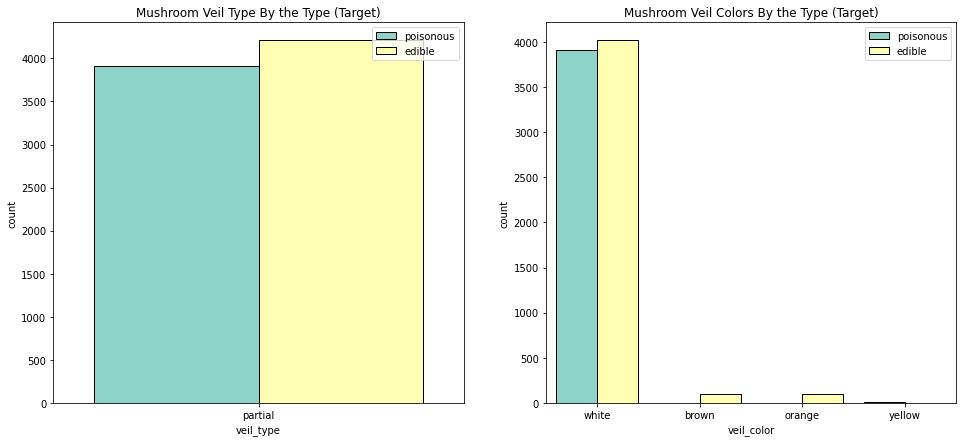

In [14]:
# Mushroom Veil infromation 
plt.figure(figsize=(25,7))
plt.subplot(1 , 3 , 1)
sns.countplot(x = df.veil_type , hue = df.target , saturation=1,
                  edgecolor=(0,0,0), linewidth=1).set(title= 'Mushroom Veil Type By the Type (Target)');
plt.legend(loc='upper right')

plt.subplot(1 , 3 , 2)
sns.countplot(x = df.veil_color , hue = df.target , saturation=1,
                  edgecolor=(0,0,0), linewidth=1).set(title= 'Mushroom Veil Colors By the Type (Target)');
plt.legend(loc='upper right');

##### Mushroom Ring Info

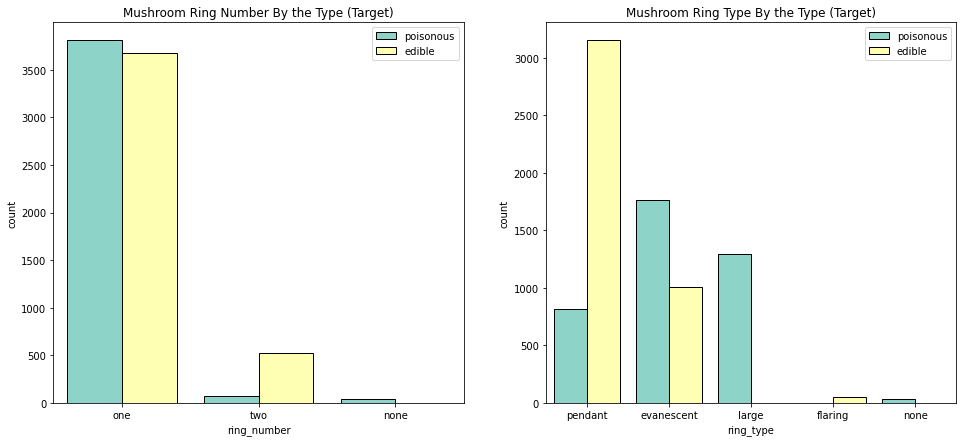

In [15]:
# Mushroom Ring infromation 
plt.figure(figsize=(25,7))
plt.subplot(1 , 3 , 1)
sns.countplot(x = df.ring_number , hue = df.target , saturation=1,
                  edgecolor=(0,0,0), linewidth=1).set(title= 'Mushroom Ring Number By the Type (Target)');
plt.legend(loc='upper right')

plt.subplot(1 , 3 , 2)
sns.countplot(x = df.ring_type , hue = df.target , saturation=1,
                  edgecolor=(0,0,0), linewidth=1).set(title= 'Mushroom Ring Type By the Type (Target)');
plt.legend(loc='upper right');

## Data Preparation

##### Convert Binary Values to 0,1 (Target)

In [16]:
# convert target values to 0 and 1 - binary
label_encoding = preprocessing.LabelEncoder()
df.target= label_encoding.fit_transform(df.target.astype(str))
df.target.head()

0    1
1    0
2    0
3    1
4    0
Name: target, dtype: int64

In [17]:
label_encoding.classes_ # 0 -> ('edible') , 1 -> ('poisonous')

array(['edible', 'poisonous'], dtype=object)

In [18]:
len(df['cap_color'].value_counts().to_list())

10

##### Convert Categorical Values to Numbers

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i].astype(str))

df.head()

,target,cap_shape,cap_surface,cap_color,bruises,odor,gill-attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface-below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,2,3,0,1,7,1,0,1,0,0,2,3,3,7,7,0,2,1,4,0,3,4
1,0,2,3,9,1,0,1,0,0,0,0,1,3,3,7,7,0,2,1,4,1,2,0
2,0,0,3,8,1,1,1,0,0,1,0,1,3,3,7,7,0,2,1,4,1,2,2
3,1,2,2,8,1,7,1,0,1,1,0,2,3,3,7,7,0,2,1,4,0,3,4
4,0,2,3,3,0,6,1,1,0,0,1,2,3,3,7,7,0,2,1,0,1,0,0


In [20]:
corr = df.corr()
corr.style.background_gradient(cmap='Blues')
# viel type (has only 1 values) appears as nan but there is no nan values !

/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,target,cap_shape,cap_surface,cap_color,bruises,odor,gill-attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface-below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
target,1.000000,0.199488,0.186806,0.058452,-0.501530,-0.086800,0.129200,-0.348387,0.540024,-0.270247,-0.102019,0.094766,-0.215088,-0.139254,-0.263928,-0.245231,nan,0.145142,-0.214366,-0.411771,0.519438,0.298686,-0.022363
cap_shape,0.199488,1.000000,-0.007059,-0.176574,-0.199703,0.251055,0.032099,-0.061368,0.259001,-0.069180,0.248495,0.175423,-0.070942,-0.068732,-0.059667,-0.067470,nan,0.036995,-0.069245,-0.304673,0.251207,0.129000,0.134210
cap_surface,0.186806,-0.007059,1.000000,-0.022923,-0.019547,-0.105749,-0.161757,-0.096076,0.274933,-0.122924,0.037139,0.386239,0.015424,-0.000094,0.250617,0.260090,nan,-0.154804,0.060429,-0.171361,0.310188,-0.188979,-0.191609
cap_color,0.058452,-0.176574,-0.022923,1.000000,0.034513,-0.318907,0.192322,0.023269,-0.091914,-0.020306,-0.240248,-0.143640,-0.017087,-0.026967,-0.044439,-0.025502,nan,0.188903,0.010226,0.088491,-0.079787,-0.017712,-0.089724
bruises,-0.501530,-0.199703,-0.019547,0.034513,1.000000,-0.079235,0.137359,-0.299473,-0.369596,0.348658,0.099364,-0.398393,0.386893,0.323013,0.197177,0.213054,nan,0.119770,0.056788,0.692973,-0.519982,0.088137,0.305354
odor,-0.086800,0.251055,-0.105749,-0.318907,-0.079235,1.000000,-0.092471,0.114297,0.037037,0.074913,0.344635,0.071190,-0.044410,0.060100,-0.012270,-0.026790,nan,-0.086768,0.164708,-0.161269,0.093370,0.003753,0.126054
gill-attachment,0.129200,0.032099,-0.161757,0.192322,0.137359,-0.092471,1.000000,0.071489,0.108984,-0.080726,0.186485,-0.173710,-0.083189,-0.075554,0.122946,0.116158,nan,0.897518,0.093236,-0.146689,-0.068909,0.165575,0.115387
gill_spacing,-0.348387,-0.061368,-0.096076,0.023269,-0.299473,0.114297,0.071489,1.000000,-0.108333,-0.037735,0.080895,0.152667,-0.298008,-0.241945,0.319259,0.271301,nan,0.073363,0.243014,-0.195897,-0.092992,-0.529253,-0.397884
gill_size,0.540024,0.259001,0.274933,-0.091914,-0.369596,0.037037,0.108984,-0.108333,1.000000,-0.330580,0.214576,0.526677,0.090346,0.087102,0.271111,0.228629,nan,0.103809,-0.171362,-0.460872,0.549444,0.147682,0.088058
gill_color,-0.270247,-0.069180,-0.122924,-0.020306,0.348658,0.074913,-0.080726,-0.037735,-0.330580,1.000000,-0.185632,-0.283404,0.114802,0.057044,-0.064741,-0.101458,nan,-0.048532,0.235151,0.389234,-0.144126,0.027168,0.185011


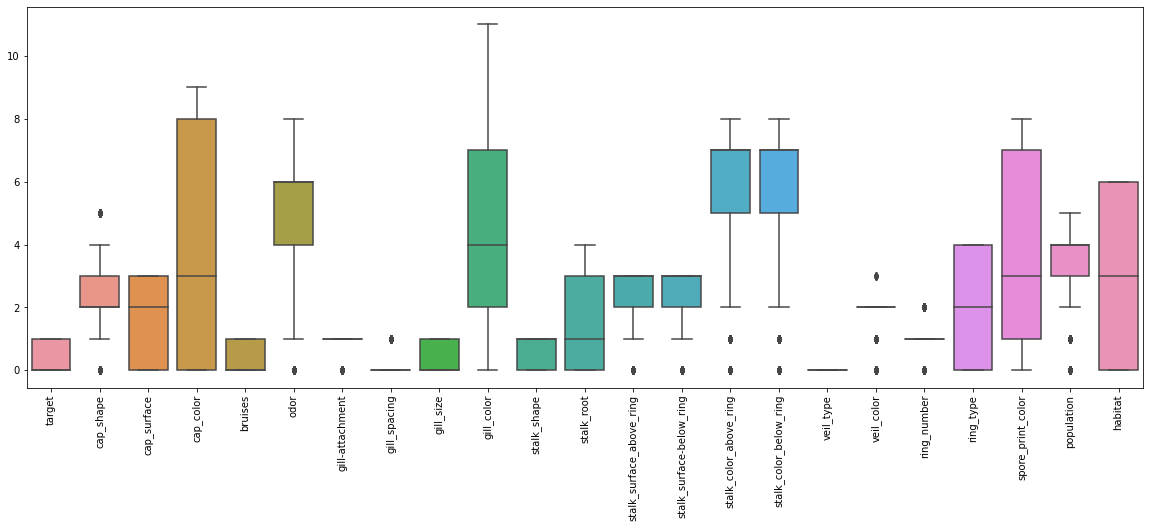

In [21]:
# scatter to visualize the relation between the target and spore_print_color(high corr)
plt.figure(figsize=(20,7))
sns.boxplot(data = df)
plt.xticks(rotation=90);

##### Convert Categorical Values to 0 and 1 using dummies

In [22]:
df = pd.get_dummies(df ,columns= ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill-attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface-below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'])
df.head()

,target,cap_shape_0,cap_shape_1,cap_shape_2,cap_shape_3,cap_shape_4,cap_shape_5,cap_surface_0,cap_surface_1,cap_surface_2,cap_surface_3,cap_color_0,cap_color_1,cap_color_2,cap_color_3,cap_color_4,cap_color_5,cap_color_6,cap_color_7,cap_color_8,cap_color_9,bruises_0,bruises_1,odor_0,odor_1,odor_2,odor_3,odor_4,odor_5,odor_6,odor_7,odor_8,gill-attachment_0,gill-attachment_1,gill_spacing_0,gill_spacing_1,gill_size_0,gill_size_1,gill_color_0,gill_color_1,...,stalk_color_below_ring_4,stalk_color_below_ring_5,stalk_color_below_ring_6,stalk_color_below_ring_7,stalk_color_below_ring_8,veil_type_0,veil_color_0,veil_color_1,veil_color_2,veil_color_3,ring_number_0,ring_number_1,ring_number_2,ring_type_0,ring_type_1,ring_type_2,ring_type_3,ring_type_4,spore_print_color_0,spore_print_color_1,spore_print_color_2,spore_print_color_3,spore_print_color_4,spore_print_color_5,spore_print_color_6,spore_print_color_7,spore_print_color_8,population_0,population_1,population_2,population_3,population_4,population_5,habitat_0,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


#### Train Test Split

In [23]:
# select split parameter
x = df.drop(['target'], axis=1)
y = df.target

In [24]:
# splitting into train and test sets for both parameters
x_train, x_test ,y_train , y_test = train_test_split(x,y, test_size=0.7, random_state= 42)

In [25]:
y_train.head()

6983    1
6721    1
4049    1
3485    0
2474    0
Name: target, dtype: int64

In [26]:
y_test.value_counts()

0    2905
1    2782
Name: target, dtype: int64

## Modeling

#### Baseline Model

In [27]:
def baseline_model(n_predictions, value_to_predict):
    """
    just predict a single value (e.g. mean) for everything
    """
    # list to save all the predicted values in
    baseline_preds = []
    for i in range(n_predictions): # loop through your training set size
        baseline_preds.append(value_to_predict) # predict the most common values for each row and store it in the list
    return pd.Series(baseline_preds) # return the predictions list as series

n_predictions = len(y_test)  # how many predictions to make?
baseline_value = y_train.value_counts().index[0]  # what value to predict? (classification = most common class (0 = edible))

baseline_preds = baseline_model(n_predictions, baseline_value)
baseline_preds # print all predicted values

0       0
1       0
2       0
3       0
4       0
       ..
5682    0
5683    0
5684    0
5685    0
5686    0
Length: 5687, dtype: int64

##### Baseline - Accuracy

In [28]:
acc_base = accuracy_score(y_test , baseline_preds)
acc_base

0.510814137506594

##### Baseline - Confusion Matrix

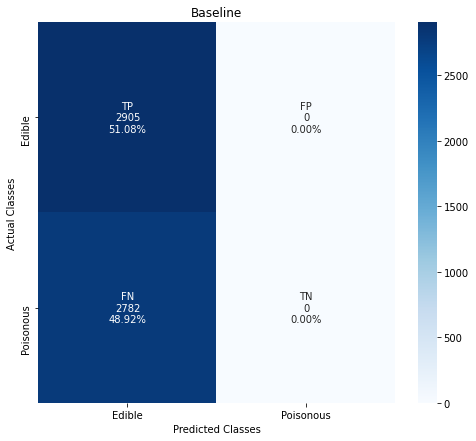

In [29]:
cf = confusion_matrix(y_test, baseline_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['Edible', 'Poisonous']

plt.figure(figsize=(8,7))
sns.heatmap(cf, annot=labels, fmt='', cmap='Blues' , yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Baseline")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
sns.set(font_scale=1.5);

#### Logistic Regression

In [30]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_preds = lr.predict(x_test)
lr_preds

array([0, 1, 1, ..., 0, 1, 1])

##### LR - Accuracy

In [31]:
acc_lr = accuracy_score(y_test , lr_preds)
acc_lr

0.9998241603657464

##### LR - Confusion Matrix

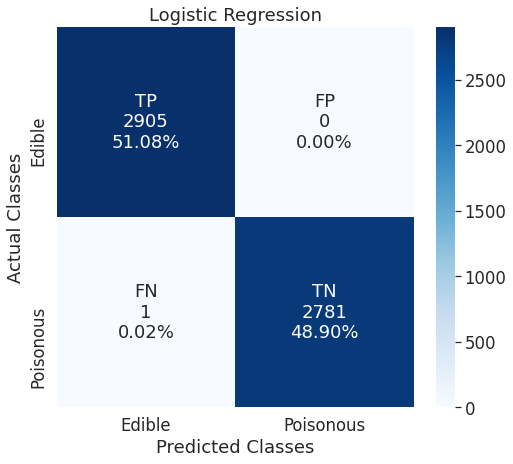

In [32]:
cf = confusion_matrix(y_test, lr_preds)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['Edible', 'Poisonous']

plt.figure(figsize=(8,7))
sns.heatmap(cf, annot=labels, fmt='', cmap='Blues' , yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Logistic Regression")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
sns.set(font_scale=1.5);

#### KNN

In [33]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [34]:
perds_knn = knn.predict(x_test)
perds_knn

array([0, 1, 1, ..., 0, 1, 1])

##### KNN - Accuracy

In [35]:
knn_acc = accuracy_score(y_test, perds_knn)
knn_acc

1.0

##### KNN - Confusion Matrix

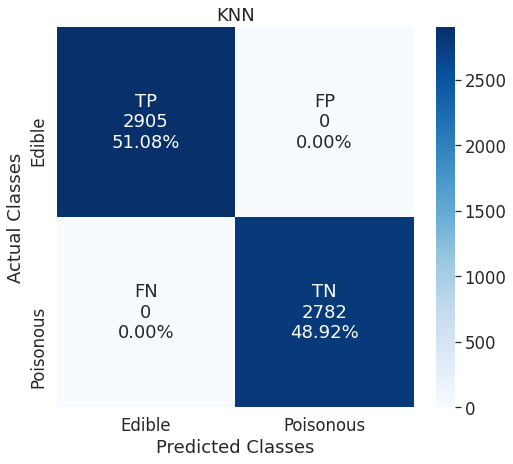

In [36]:
cf = confusion_matrix(y_test, perds_knn)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['Edible', 'Poisonous']

plt.figure(figsize=(8,7))
sns.heatmap(cf, annot=labels, fmt='', cmap='Blues' , yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("KNN")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
sns.set(font_scale=1.5);

## Model Tuning

##### GridSearchCV

In [ ]:
p_grid = {'fit_intercept': [True, False],
          'solver':[ "newton-cg", "lbfgs", "liblinear", "sag", "saga"],
          'max_iter': [100, 150, 200,250,500, 10000] , 
          'penalty': ['l2', 'l1']
}

grid = GridSearchCV(lr, p_grid, cv=7)
grid.fit(x_train, y_train)

In [38]:
grid.best_params_

{'fit_intercept': True,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [39]:
lr = LogisticRegression(fit_intercept= True, max_iter= 100, solver='liblinear' , penalty = 'l1')
lr.fit(x_train , y_train)
lr_preds_grid= lr.predict(x_test)
lr_preds_grid

array([0, 1, 1, ..., 0, 1, 1])

###### LR - GridSerachCV Accuracy

In [40]:
acc_lr_grid = accuracy_score(y_test , lr_preds_grid)
acc_lr_grid

0.9992966414629858

###### LR - GridSerachCV Confusion Matrix

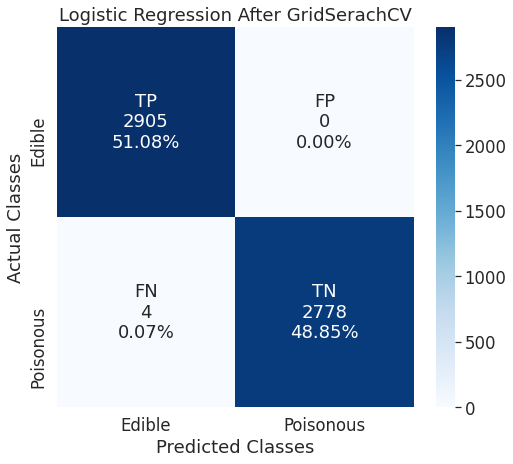

In [41]:
cf = confusion_matrix(y_test, lr_preds_grid)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['Edible', 'Poisonous']

plt.figure(figsize=(8,7))
sns.heatmap(cf, annot=labels, fmt='', cmap='Blues' , yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Logistic Regression After GridSerachCV")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
sns.set(font_scale=1.5);

##### RandomizedSearchCV

In [42]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [43]:
# update the logistic model back to standard
lr = LogisticRegression()
lr.fit(x_train , y_train)
lr_preds2 = lr.predict(x_test)

In [44]:
accuracy_score(y_test , lr_preds2)

0.9998241603657464

In [ ]:
# parameters
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])
# RandomizedSerach Object
clf = RandomizedSearchCV(lr, distributions, cv=7)
search = clf.fit(x_train, y_train)

In [46]:
search.best_params_

{'C': 2.86057495184674, 'penalty': 'l2'}

In [47]:
lr = LogisticRegression(C = 2.86057495184674 , penalty = 'l2' )
lr.fit(x_train , y_train)

LogisticRegression(C=2.86057495184674, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
lr_preds_search = lr.predict(x_test)

###### LR - RandomizedSearchCV Accuracy

In [49]:
acc_lr_search = accuracy_score(y_test , lr_preds_search)
acc_lr_search

1.0

###### LR - RandomizedSearchCV Confusion Matrix

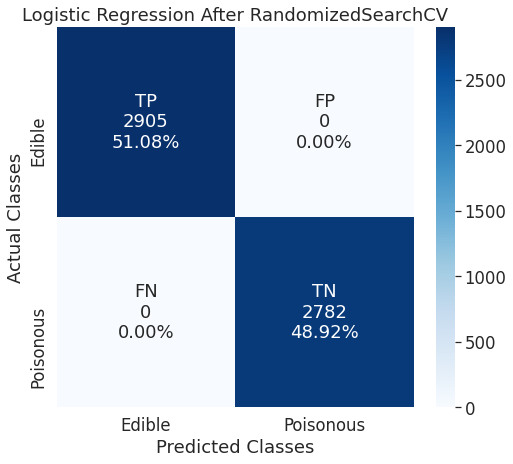

In [50]:
cf = confusion_matrix(y_test, lr_preds_search)
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ticks_labels = ['Edible', 'Poisonous']

plt.figure(figsize=(8,7))
sns.heatmap(cf, annot=labels, fmt='', cmap='Blues' , yticklabels=ticks_labels , xticklabels= ticks_labels);
plt.title("Logistic Regression After RandomizedSearchCV")
plt.ylabel('Actual Classes')
plt.xlabel('Predicted Classes')
sns.set(font_scale=1.5);

## Compare Results

### Visualizaing Scores

In [51]:
# Save each Accuracy with its model name in a data frame
accuracies = pd.DataFrame()
accuracies['names'] = ['Baseline','Logistic' , 'Logistic After Grid' , 'Logistic After Search' , 'KNN']
accuracies['values'] = [acc_base , acc_lr , acc_lr_grid , acc_lr_search , knn_acc]

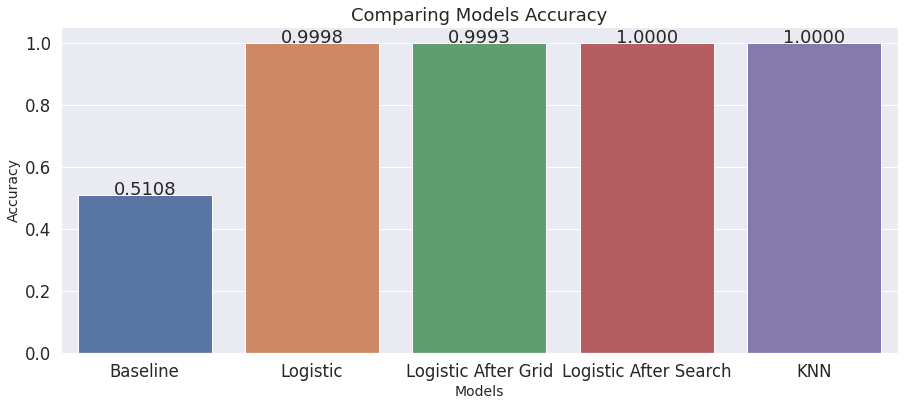

In [52]:
plt.figure(figsize=(15, 6))
splot=sns.barplot(x="names",y="values",data=accuracies)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xlabel("Models", size=14)
plt.ylabel("Accuracy", size=14)
plt.title('Comparing Models Accuracy');

### Roc

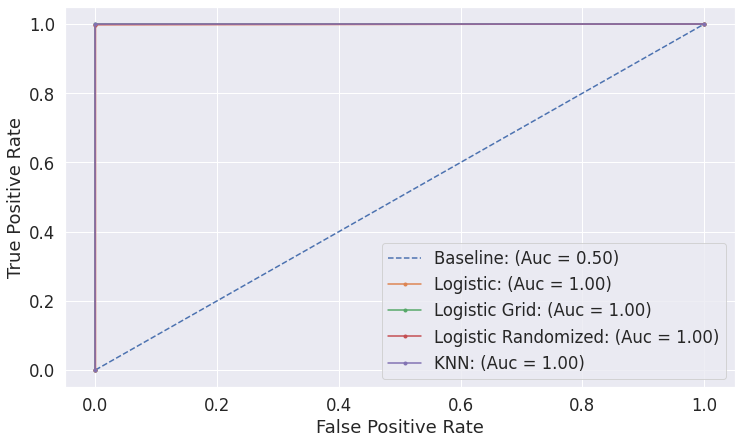

In [53]:
# calculate roc curves
bl_fpr, bl_tpr, _ = roc_curve(y_test, baseline_preds)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_preds)
lr_g_fpr, lr_g_tpr, _ = roc_curve(y_test, lr_preds_grid)
lr_s_fpr, lr_s_tpr, _ = roc_curve(y_test, lr_preds_search)
knn_fpr, knn_tpr, _ = roc_curve(y_test, perds_knn)
# area under the curve
bl_auc = auc(bl_fpr , bl_tpr)
lr_auc = auc(lr_fpr , lr_tpr)
lr_g_auc = auc(lr_g_fpr , lr_g_tpr)
lr_s_auc = auc(lr_s_fpr , lr_s_tpr)
knn_auc = auc(knn_fpr , knn_tpr)
# plot the roc curve for the model
plt.figure(figsize=(12,7))
plt.plot(bl_fpr, bl_tpr, linestyle='--', label='Baseline: (Auc = %0.2f)' % bl_auc)
plt.plot(lr_g_fpr, lr_g_tpr, marker='.', label='Logistic: (Auc = %0.2f)' % lr_auc)
plt.plot(lr_s_fpr, lr_s_tpr, marker='.', label='Logistic Grid: (Auc = %0.2f)' % lr_g_auc)
plt.plot(lr_g_fpr, lr_g_tpr, marker='.', label='Logistic Randomized: (Auc = %0.2f)' % lr_s_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN: (Auc = %0.2f)' % knn_auc)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend();

# Conclusion :

**Steps we followed:**
1. Data Prepration
  *  We changed every columns value from one letter to whole words so it can be more understanble
  *  Before splitting we changed every column value to 0 and 1
  *  We splitted the Data Train 70% and test 30%, and random state values is 42

2. Modeling 
  1. **Baseline Model** 
    *  The values predicted for each observation was the most common value in the train set (which was edible)
    *  The model scored 51.08%
       *  **Confusion Matrix Result:** 
          *  TP = 2905
          *  FP = 0
          *  TN = 0
          *  FN = 2782
  2. **Logistic Regression**
    * The model scored 99.98% before tuning 
       *  **Confusion Matrix Result:**
          *  TP = 2905
          *  FP = 0
          *  TN = 2781
          *  FN = 1
    * The model scored 99.93% after tuning with GridSearchCV (with the parameter: fit_intercept ,max_iter, penalty, solver)
       *  **Confusion Matrix Result:** 
          *  TP = 2905
          *  FP = 0
          *  TN = 2778
          *  FN = 4
    * The model scored 100% after tuning with RandomizedSearchCV (with the parameter: C, penalty)
       *  **Confusion Matrix Result:**
          *  TP = 2905
          *  FP = 0
          *  TN = 2782
          *  FN = 0
  3. **k-Nearest Neighbors**
    *  The model scored 100%.
       *  **Confusion Matrix Result:**
          *  TP = 2905
          *  FP = 0
          *  TN = 2782
          *  FN = 0

**To Conclude:**
*  The KNN and Logistic Regression with RandomizedSearchCV models scored the highest and its FP and FN were the lowest rather than the other models 